In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.utils import resample


In [4]:
# Load the Data Set


df = pd.read_excel(r"D:\data science\Assignments\Basic stats - 1\glass.xlsx", sheet_name='glass')
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# EDA
df.shape

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [24]:
# Summary Statistics
df.describe()


,Prepare a model for glass classification using Random Forest
count,18
unique,18
top,Data Description:
freq,1


In [6]:
# missing values
df.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
# Data Visualization

df_encoded = df.copy()

# Encode categorical columns 
categorical_cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

    # Histogram
    df_encoded.hist(figsize=(12, 8))
plt.show()



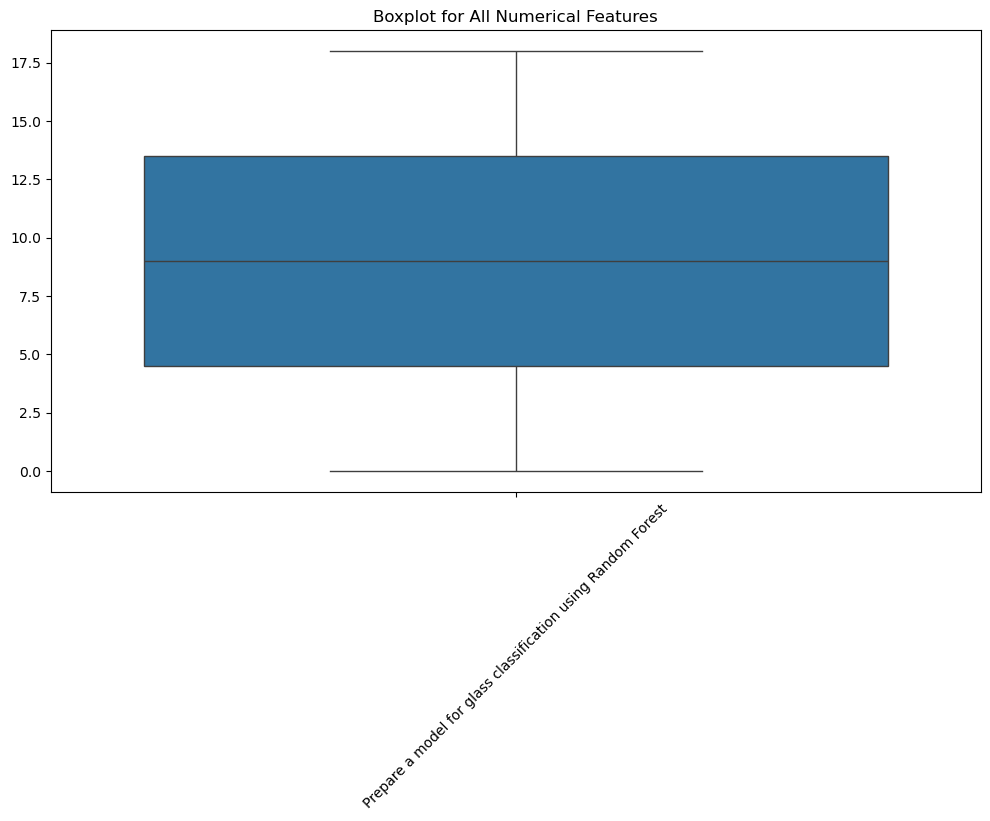

In [27]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded)
plt.title("Boxplot for All Numerical Features")
plt.xticks(rotation=45)
plt.show()

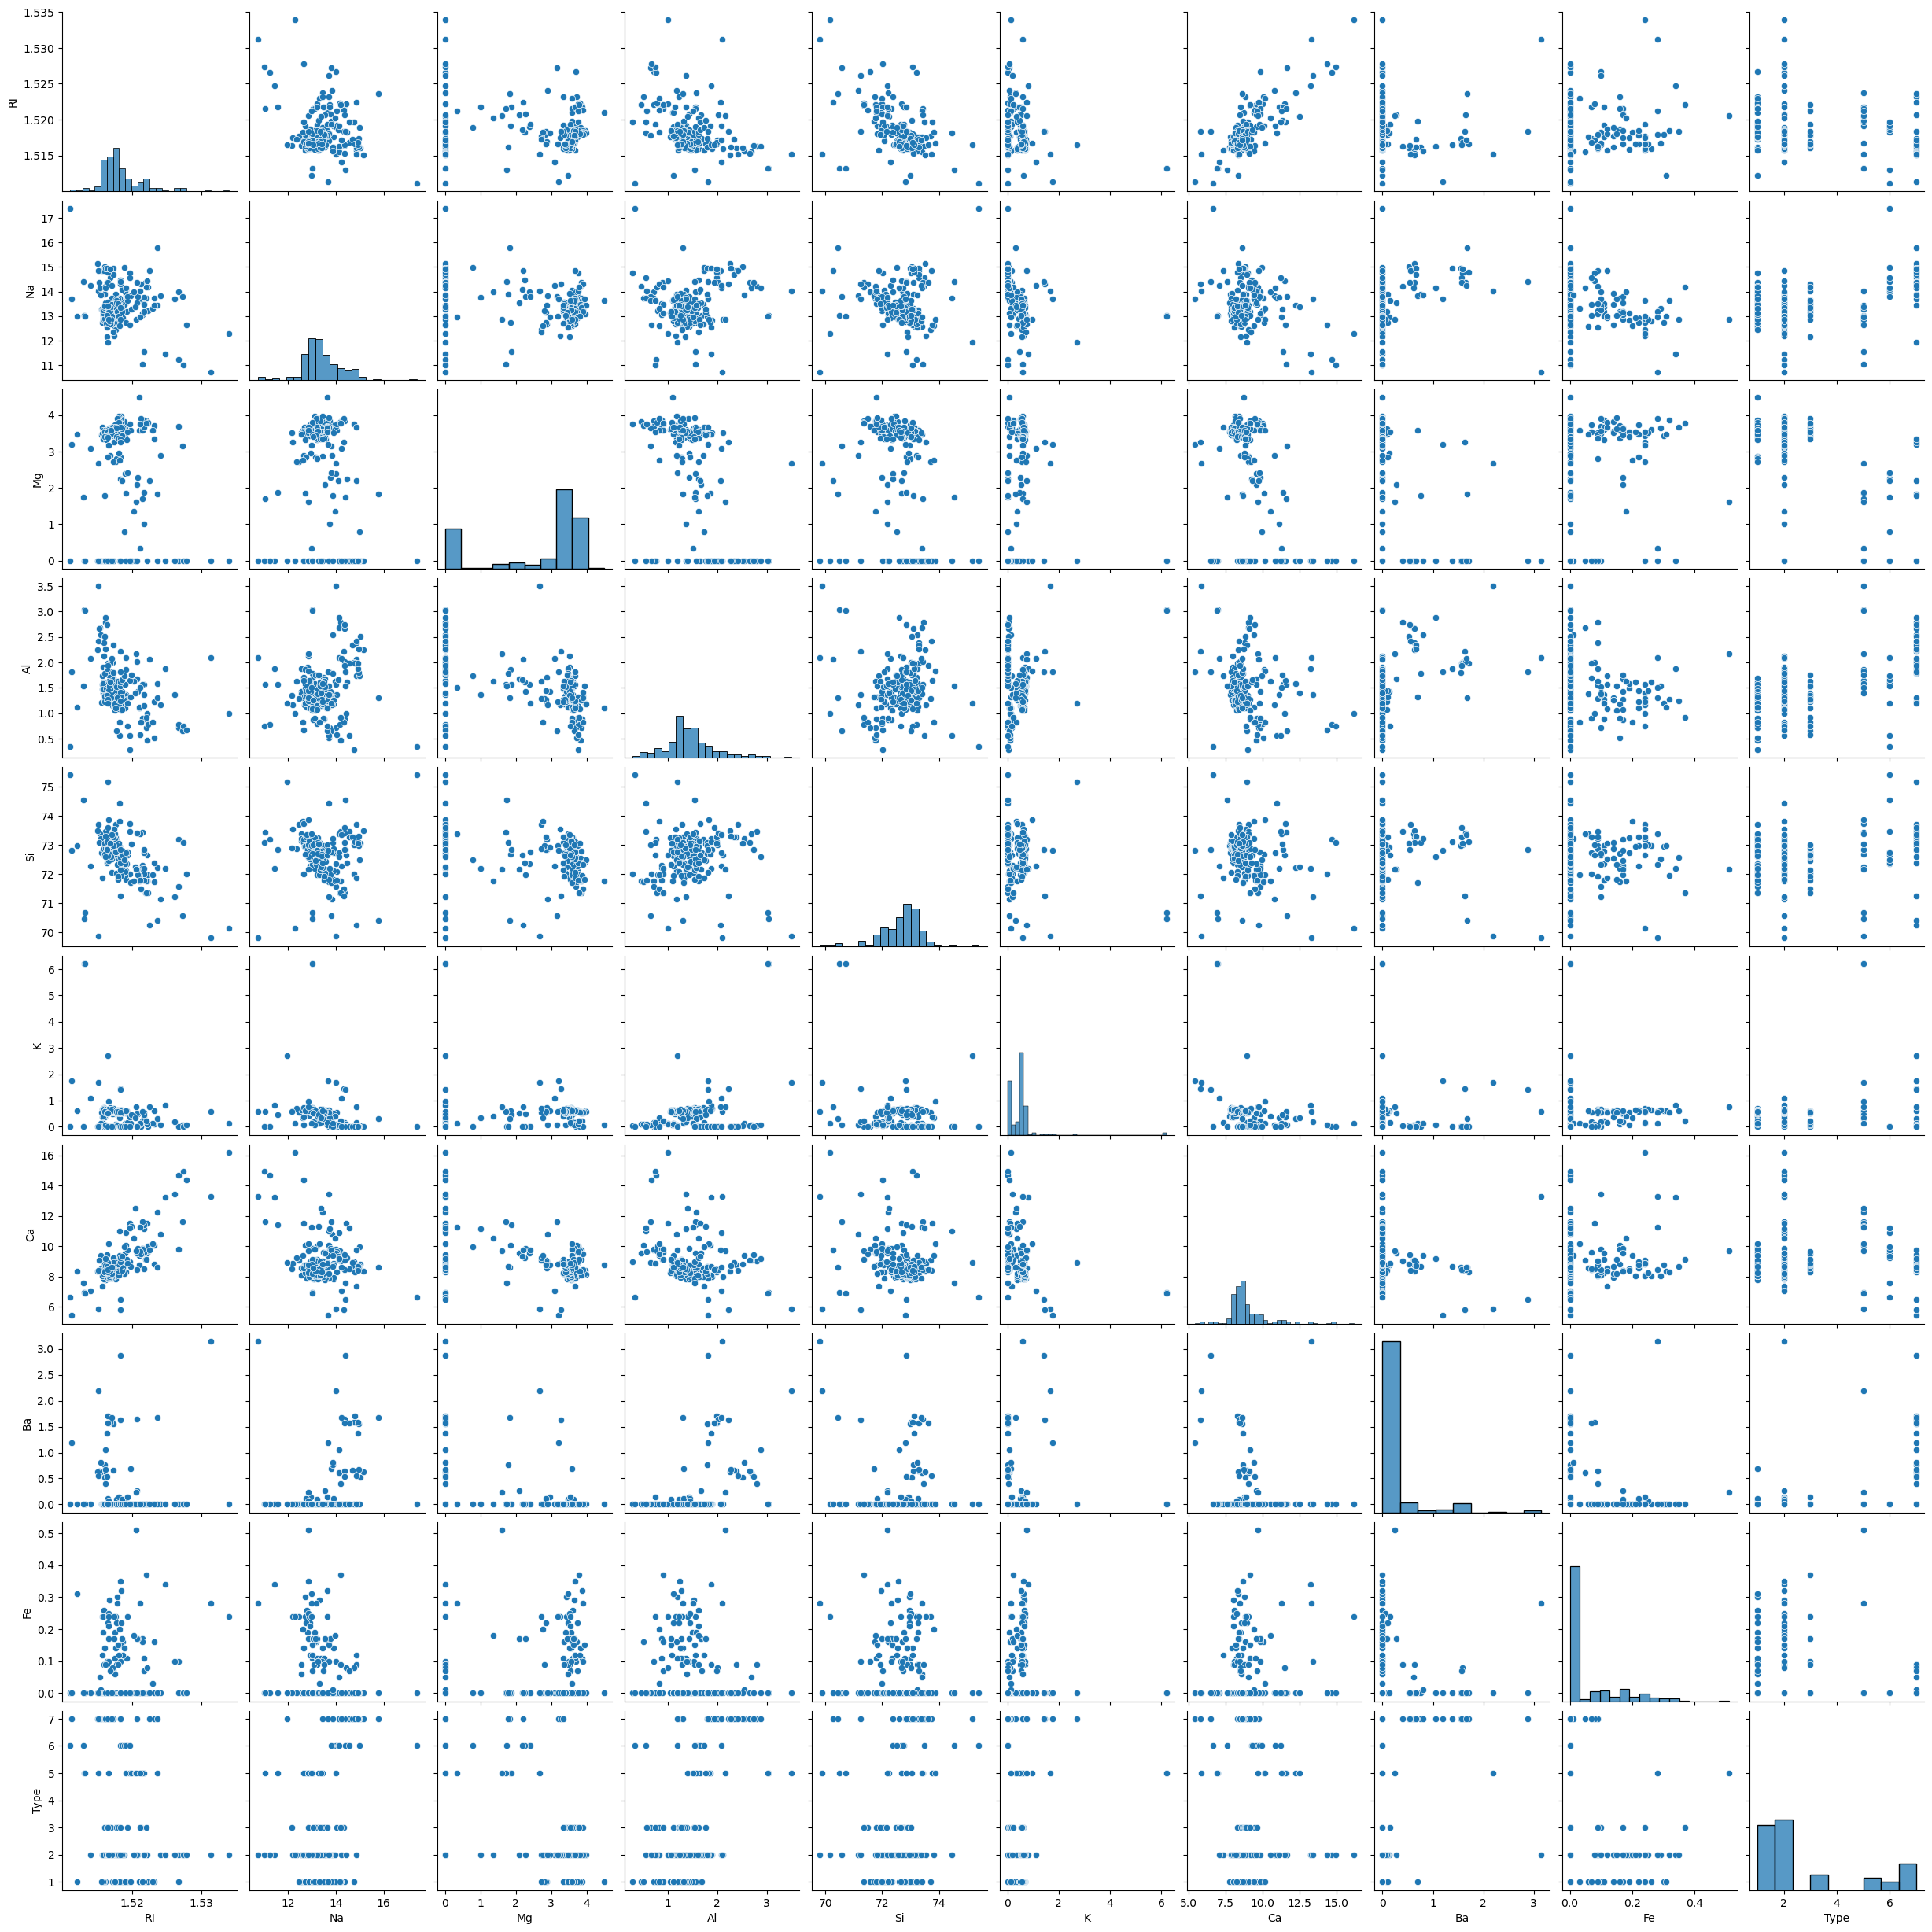

In [8]:
#  pairplot
num_cols = df_encoded.select_dtypes(include='number')

sns.pairplot(num_cols)
plt.show()



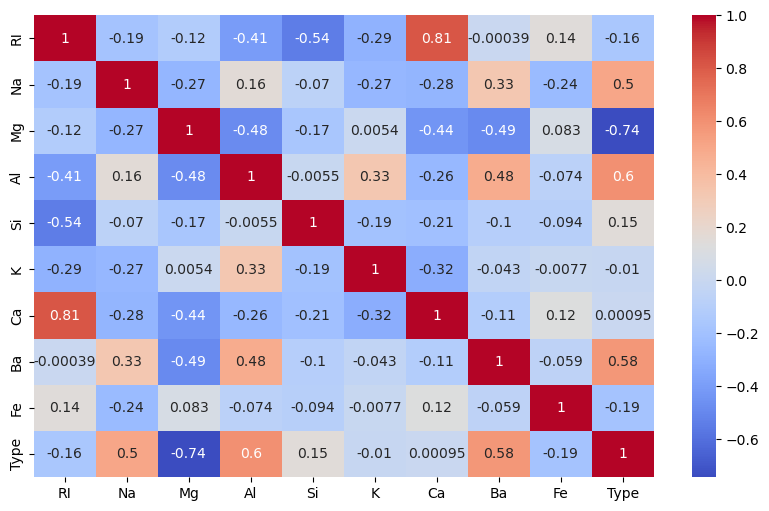

In [10]:
#  correlation heat map




# Get numeric columns only
num_cols = df.select_dtypes(include='number').columns

if len(num_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.show()
else:
    print(" Not enough numeric columns to plot correlation heatmap.")



In [25]:
# Preprocessing

# Check missing values again
df.isnull().sum()

# Encode Categorical variables

X = df.drop('Type', axis=1)
y = df['Type']


#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [26]:
# Random forest 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Handle class imbalance
# Check Target Distribution
y.value_counts()

# If imbalance exists, you can use resampling (example for majority upsampling)
df_balanced = pd.concat([X, y], axis=1)
majority_class = df_balanced[df_balanced['Type']==1]
minority_classes = df_balanced[df_balanced['Type']!=1]

# Upsample minority classes
minority_upsampled = resample(minority_classes, 
                              replace=True, n_samples=len(majority_class), random_state=42)

df_balanced = pd.concat([majority_class, minority_upsampled])
X = df_balanced.drop('Type', axis=1)
y = df_balanced['Type']
X_scaled = scaler.fit_transform(X)







Accuracy: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [27]:
# Bagging & Boosting

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Bagging with Random Forest as the base estimator
bag_model = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=50,
    random_state=42
)

# Train the model
bag_model.fit(X_train, y_train)

# Make predictions
y_pred_bag = bag_model.predict(X_test)

# Evaluate accuracy
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))



Bagging Accuracy: 0.8372093023255814


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Gradient Boosting Classifier
boost_model = GradientBoostingClassifier(
    n_estimators=100,    # number of boosting stages
    learning_rate=0.1,   # step size shrinkage
    random_state=42
)

# Train the model
boost_model.fit(X_train, y_train)

# Make predictions
y_pred_boost = boost_model.predict(X_test)

# Evaluate performance
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_boost))


Boosting Accuracy: 0.8604651162790697

Classification Report:
               precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43



In [ ]:
# 1. Explain Bagging and Boosting methods. How is it different from each other.


# Bagging (Bootstrap Aggregating):
 # Builds multiple independent models on random subsets of the data.
# Reduces variance and helps prevent overfitting.
# Example: Random Forest is a bagging method.

# Boosting:

# Builds models sequentially, where each new model focuses on correcting errors from previous models.
# Reduces bias and improves accuracy but can overfit if not tuned.
# Example: Gradient Boosting, AdaBoost.


# 2. Explain how to handle imbalance in the data. do this
# Resampling:
# Upsample minority classes or downsample majority classes.

# Class weights:
# Assign higher weight to minority classes in model training.
# Synthetic data:
# Use techniques like SMOTE to generate synthetic samples for minority classes.